#Rakam Tanıma Uygulaması

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
##Kurulum Ve Kontroller

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8507037890755367682, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7108729761691831943
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9386493262875768386
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 797699102823533546
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

##Drive da dosya konumlandırmayı yapma işlemleri

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls 

mkdir: cannot create directory ‘drive’: Operation not supported
/bin/bash: google-drive-ocamlfuse: command not found
'My Drive'


In [ ]:
!ls drive

ls: cannot access 'drive': No such file or directory


In [ ]:
import os 
os.chdir("My Drive/calisma_ortami/")
!pwd

/gdrive/My Drive/calisma_ortami


In [ ]:

!ls

 app.py			        MNIST_YSA.ipynb
 colabCalismaOrtami.ipynb       Uygulama_Rakam_Tanima.ipynb
 EvrisimliSinirAgi.ipynb       'Vektörler   Matrisler   Tensörler.ipynb'
'Katmanlar ve Modeller.ipynb'


In [ ]:
!pip install -q keras

##Uygulama Başlangıç

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as k

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
plt.figure(figsize=(14,14))
x,y=10,4
for i in range(40):
  plt.subplot(y,x,i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
batch_size=128
num_classes=10
epochs=5 #12 epochs önerilir 

img_rows,img_cols =28,28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes) #one hot encoding yapılıyor
y_test=keras.utils.to_categorical(y_test,num_classes)

##Model Oluşturma

In [ ]:
model=Sequential()

**Katmanların oluşturulması**

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten()) # tam bağlantı katmanı


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax')) # son katmana datasetteki class sayısı kadar nöron ekledik

**Model görselleştirme**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

##Eğitim İşlemleri

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.9187 - accuracy: 0.8704 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 2/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.1249 - accuracy: 0.9643 - val_loss: 0.0544 - val_accuracy: 0.9837
Epoch 3/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0853 - accuracy: 0.9758 - val_loss: 0.0406 - val_accuracy: 0.9870
Epoch 4/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0554 - accuracy: 0.9841 - val_loss: 0.0344 - val_accuracy: 0.9890


In [ ]:

model.save('/mnist_model.h5')


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.034381774091953046
Test Accuracy: 0.9890000224113464


##Rastgele değer için test işlemi

In [ ]:
model_test = model.save('mnist_model.h5')

In [ ]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

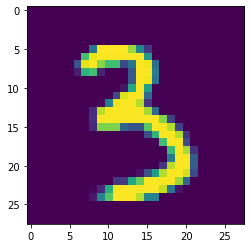

In [ ]:

plt.imshow(test_image.reshape(28,28))

In [ ]:

test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)

AttributeError: ignored